Text(0, 0.5, 'Probability')

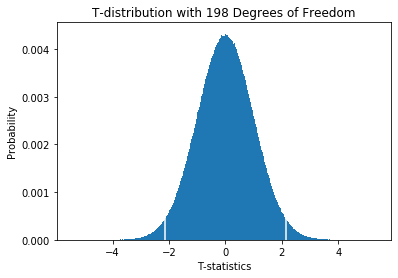

In [2]:
# Chapter19: 無作為試験(無作為抽出試験)と仮説の照合
# 19.1
import scipy
import pylab
import random

tStat = -2.13165598142 # PED-Xの例のt統計量
tDist = []
numBins = 1000
for i in range(10000000):
    tDist.append(scipy.random.standard_t(198)) # t分布

pylab.hist(tDist, bins=numBins, weights = pylab.array(len(tDist)*[1.0])/len(tDist))
pylab.axvline(tStat, color='w')
pylab.axvline(-tStat,color='w')
pylab.title('T-distribution with 198 Degrees of Freedom')
pylab.xlabel('T-statistics')
pylab.ylabel('Probability')


In [4]:
# 19.2
controlMean = sum(controlTimes)/len(controlTimes)
treatmentMean = sum(treatmentTimes)/len(treatmentTimes)
print('Treatment mean- control mean =', treatmentMean - controlMean, 'minutes')
twoSampleTest = stats.ttest_ind(treatmentTimes, controlTimes, equal_var = False)
print()

NameError: name 'controlTimes' is not defined

In [3]:
# 19.3 Create Examples
from scipy import stats
treatmentDist = (119.5,5.0)
controlDist = (120,4.0)
sampleSize = 100
treatmentTimes, controlTimes = [],[]
for s in range(sampleSize):
    treatmentTimes.append(random.gauss(treatmentDist[0],treatmentDist[1]))
    controlTimes.append(random.gauss(controlDist[0],controlDist[1]))

In [8]:
# 19.2
controlMean = sum(controlTimes)/len(controlTimes)
treatmentMean = sum(treatmentTimes)/len(treatmentTimes)
print('Treatment mean- control mean =', treatmentMean - controlMean, 'minutes')
twoSampleTest = stats.ttest_ind(treatmentTimes, controlTimes, equal_var = False)
print()

Treatment mean- control mean = -0.8316977544221231 minutes



In [9]:
#
numGames = 1273
lyndsayWins = 666
outcomes = [1.0]*lyndsayWins + [0.0]*(numGames-lyndsayWins)
print('The p-value from a one-sample test is', stats.ttest_1samp(outcomes,0.5)[1]) # 実験の平均値: 0.5 勝つか負けるかなので

The p-value from a one-sample test is 0.0982205871243577


In [10]:
# 19.4 モンテカルロシミュレーション(片側検定)
from scipy import stats
numGames = 1273
lyndsayWins = 666
numTrials = 10000
atLeast = 0
for t in range(numTrials):
    LWins = 0
    for g in range(numGames):
        if random.random() < 0.5:
            LWins += 1
    if LWins >= lyndsayWins:
        atLeast += 1
print('Probability of result at least this extreme by accident =', atLeast/numTrials)

Probability of result at least this extreme by accident = 0.0534


In [11]:
# 19.5 正しいシミュレーション
from scipy import stats
numGames = 1273
lyndsayWins = 666
numTrials = 10000
atLeast = 0
for t in range(numTrials):
    LWins,JWins = 0,0
    for g in range(numGames):
        if random.random() < 0.5:
            LWins += 1
        else:
            JWins += 1
    if LWins >= lyndsayWins or JWins >= lyndsayWins:
        atLeast += 1
print('Probability of result at least this extreme by accident =', atLeast/numTrials)

Probability of result at least this extreme by accident = 0.1036


In [1]:
def getBMData(filename):
    """与えられたファイルの内容を読み込む、
       ファイルは次の6要素がカンマで区切られた形式
       0. 氏名(string), 1. 性別(string), 2. 年齢(int), 3. 区分(走/車いす),4. 出身国(string),5. 総合タイム(float)
       返り値: それぞれが6変数のリストのdict(辞書)"""
    data = {}
    f = open(filename)
    line = f.readline()
    data['name'],data['gender'],data['age'] = [],[],[] # 辞書要素をリストで初期化
    data['division'],data['country'],data['time'] = [],[],[]
    while line != '': # 最終行まで読み込む
        split = line.split(',') # カンマで区切りリストで返す
        data['name'].append(split[0])
        data['gender'].append(split[1])
        data['age'].append(split[2])
        data['division'].append(split[3])
        data['country'].append(split[4])
        data['time'].append(float(split[5][:-1])) # 改行\nを取り除く
        line = f.readline()
    f.close()
    return data

In [4]:
# 19.6 選択された国の平均フィニッシュタイムの比較
data = getBMData('bm_results2012.txt')
countriesToCompare = ['BEL','BRA','FRA','JPN','ITA']
# 国別の女性フィニッシュタイムの辞書を作成する
countryTimes = {}
for i in range(len(data['name'])): # 各ランナーに対して
    if data['country'][i] in countriesToCompare and\
       data['gender'][i] == 'F':
        try:
           countryTimes[data['country'][i]].append(data['time'][i])
        except KeyError:
            countryTimes[data['country'][i]] = [data['time'][i]]

# 各国のフィニッシュタイムを計算する
for c1 in countriesToCompare:
    for c2 in countriesToCompare:
        if c1 < c2: # 各ペアを丁度一回比較するために != ではなく <を使う
            pVal = stats.ttest_ind(countryTimes[c1],countryTimes[c2],equal_var=False)[1] # 検定
            if pVal < 0.05:
                print(c1, 'and', c2, 'have significantly different means,', 'p-value =', round(pVal,4))


ITA and JPN have significantly different means, p-value = 0.025


In [6]:
# 多重仮説の検定
# 同じ母集団から取得した標本サイズ20の30組の標本を抽出し、それぞれに標本平均が統計的に異なるかどうかを検定する。
# 帰無仮説：平均が同じ。⇒同じ母集団から取得したので帰無仮説が真
numHyps = 20
sampleSize = 30
population = []
for i in range(5000): # 大きな母集団を生成
    population.append(random.gauss(0,1))
sample1s,sample2s = [],[]
for i in range(numHyps): # 少数標本の組を多く生成
    sample1s.append(random.sample(population, sampleSize))
    sample2s.append(random.sample(population, sampleSize))
# 統計学的に異なるかチェックする
numSig = 0
for i in range(numHyps):
    if stats.ttest_ind(sample1s[i],sample2s[i])[1] < 0.05:
        numSig += 1
print('Number of statistivally significant (p < 0.05) results =', numSig)

Number of statistivally significant (p < 0.05) results = 1


↑帰無仮説が真にもかかわらず、1組の帰無仮説が棄却されたことを示している。
p < 0.05である⇒帰無仮説が成り立つ場合でも、平均値間に少なくとも2標本間と同じくらい違いが見られる
確率が0.05。⇒20組の標本を調べて、少なくとも1組が統計学的に有意な差が生じてもおかしくない。